In [103]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_classif, RFE 
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

This dataset provides information about red and white variants of the Portuguese "Vinho Verde" wine. It includes physicochemical attributes as input variables and wine quality as the output variable, making it suitable for a classification task. The output variable, "quality," is numeric and represents a score between 0 and 10.

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are two types of data (int64,float64) present in the dataset.

In [5]:
# Checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present.

In [6]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [7]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [8]:
# Checking duplicate rows
df.duplicated().sum()

240

Dataset contains 240 dupicate rows.

In [9]:
df = df.drop_duplicates()

Duplicate rows has been removed.

In [10]:
# Checking again duplicate rows
df.duplicated().sum()

0

In [11]:
df.shape

(1359, 12)

In [12]:
df.isna().sum()  #finding the count of missing values from different columns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# Checking the list of counts of target
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
# checking the unique values in target column
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

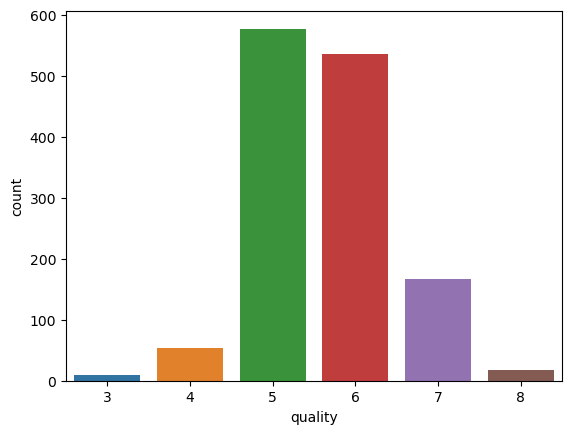

In [15]:
sns.countplot(x='quality', data=df)
plt.show()

In [16]:
# Exploring basic statistical summary
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

From the above description we can observe the following:-

The counts of all the columns are same which means there are no missing values in the dataset.

The median is less than the mean in Chlorides, free sulfer dioxide, total sulfer dioxide, density, sulphates, alcohol, fixed acidity, volatile acidity, citric acid, residual sugar columns which means the data is skewed to right in these column.

We can observe there is a huge differences between 75% and max in residual sugar, free sulfer dioxide,total sulfer dioxide columns hence there are outliers present in the data.

It can also be observed that standard deviation is very high in free sulfur dioxide, total sulfur dioxide,citric acid,residual sugar columns.

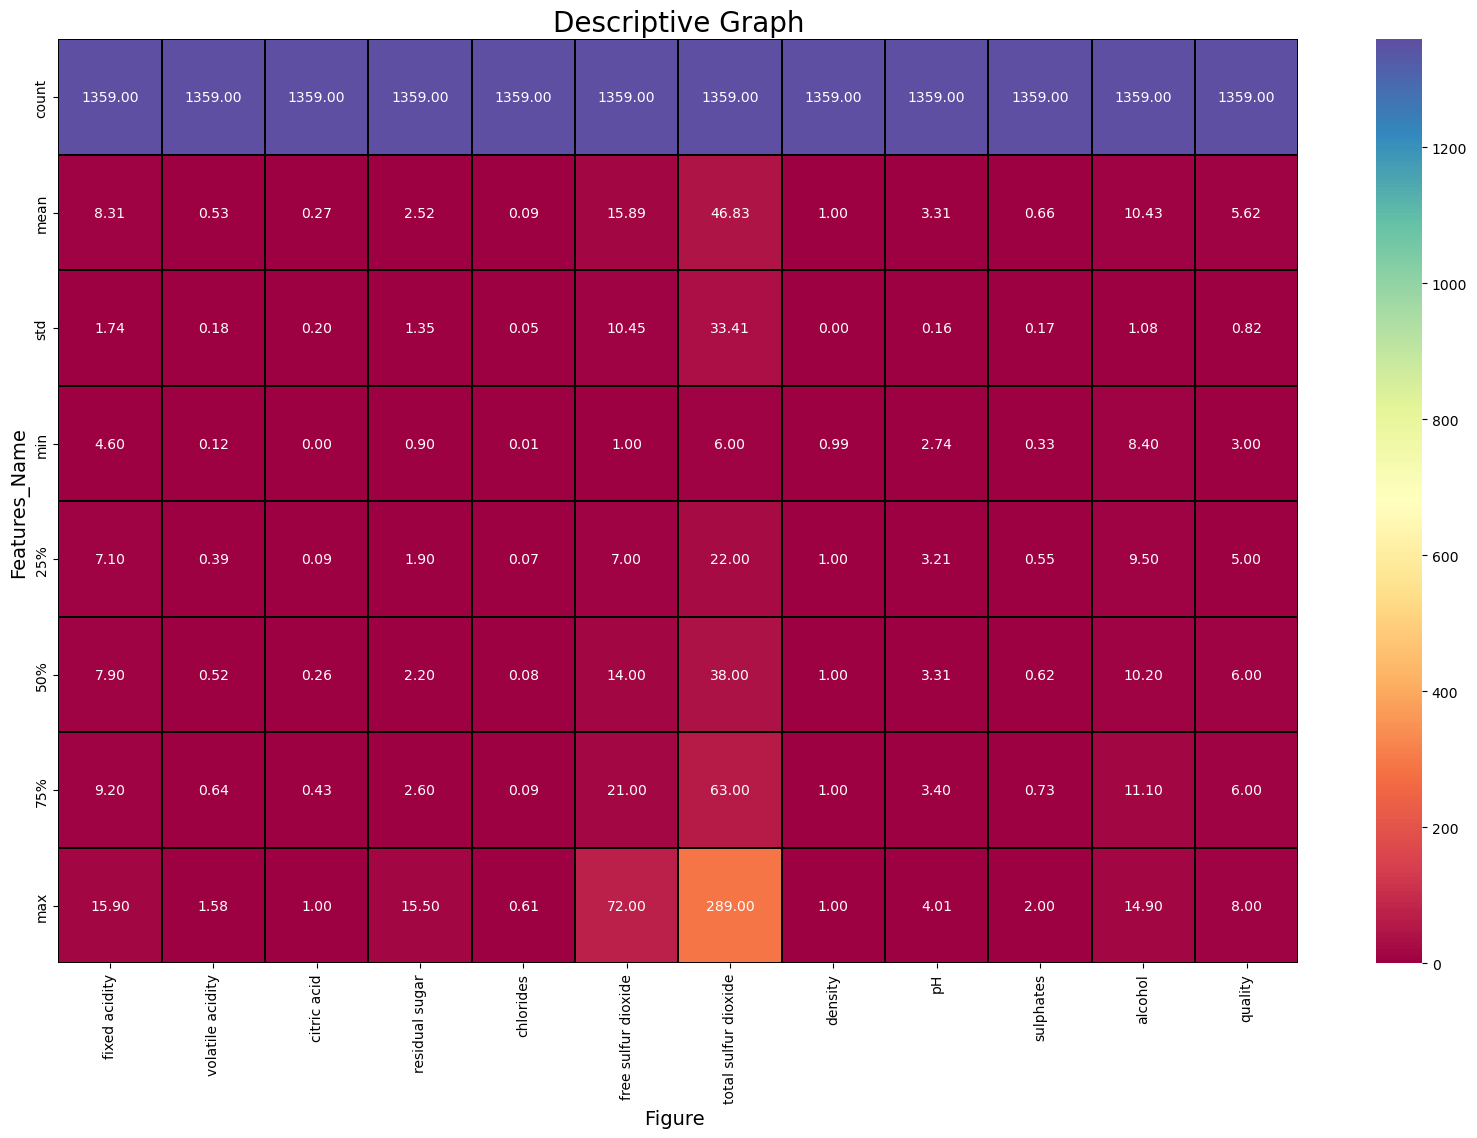

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2,linecolor="black", cmap= 'Spectral') 
plt.xlabel('Figure ', fontsize=14)
plt.ylabel('Features_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

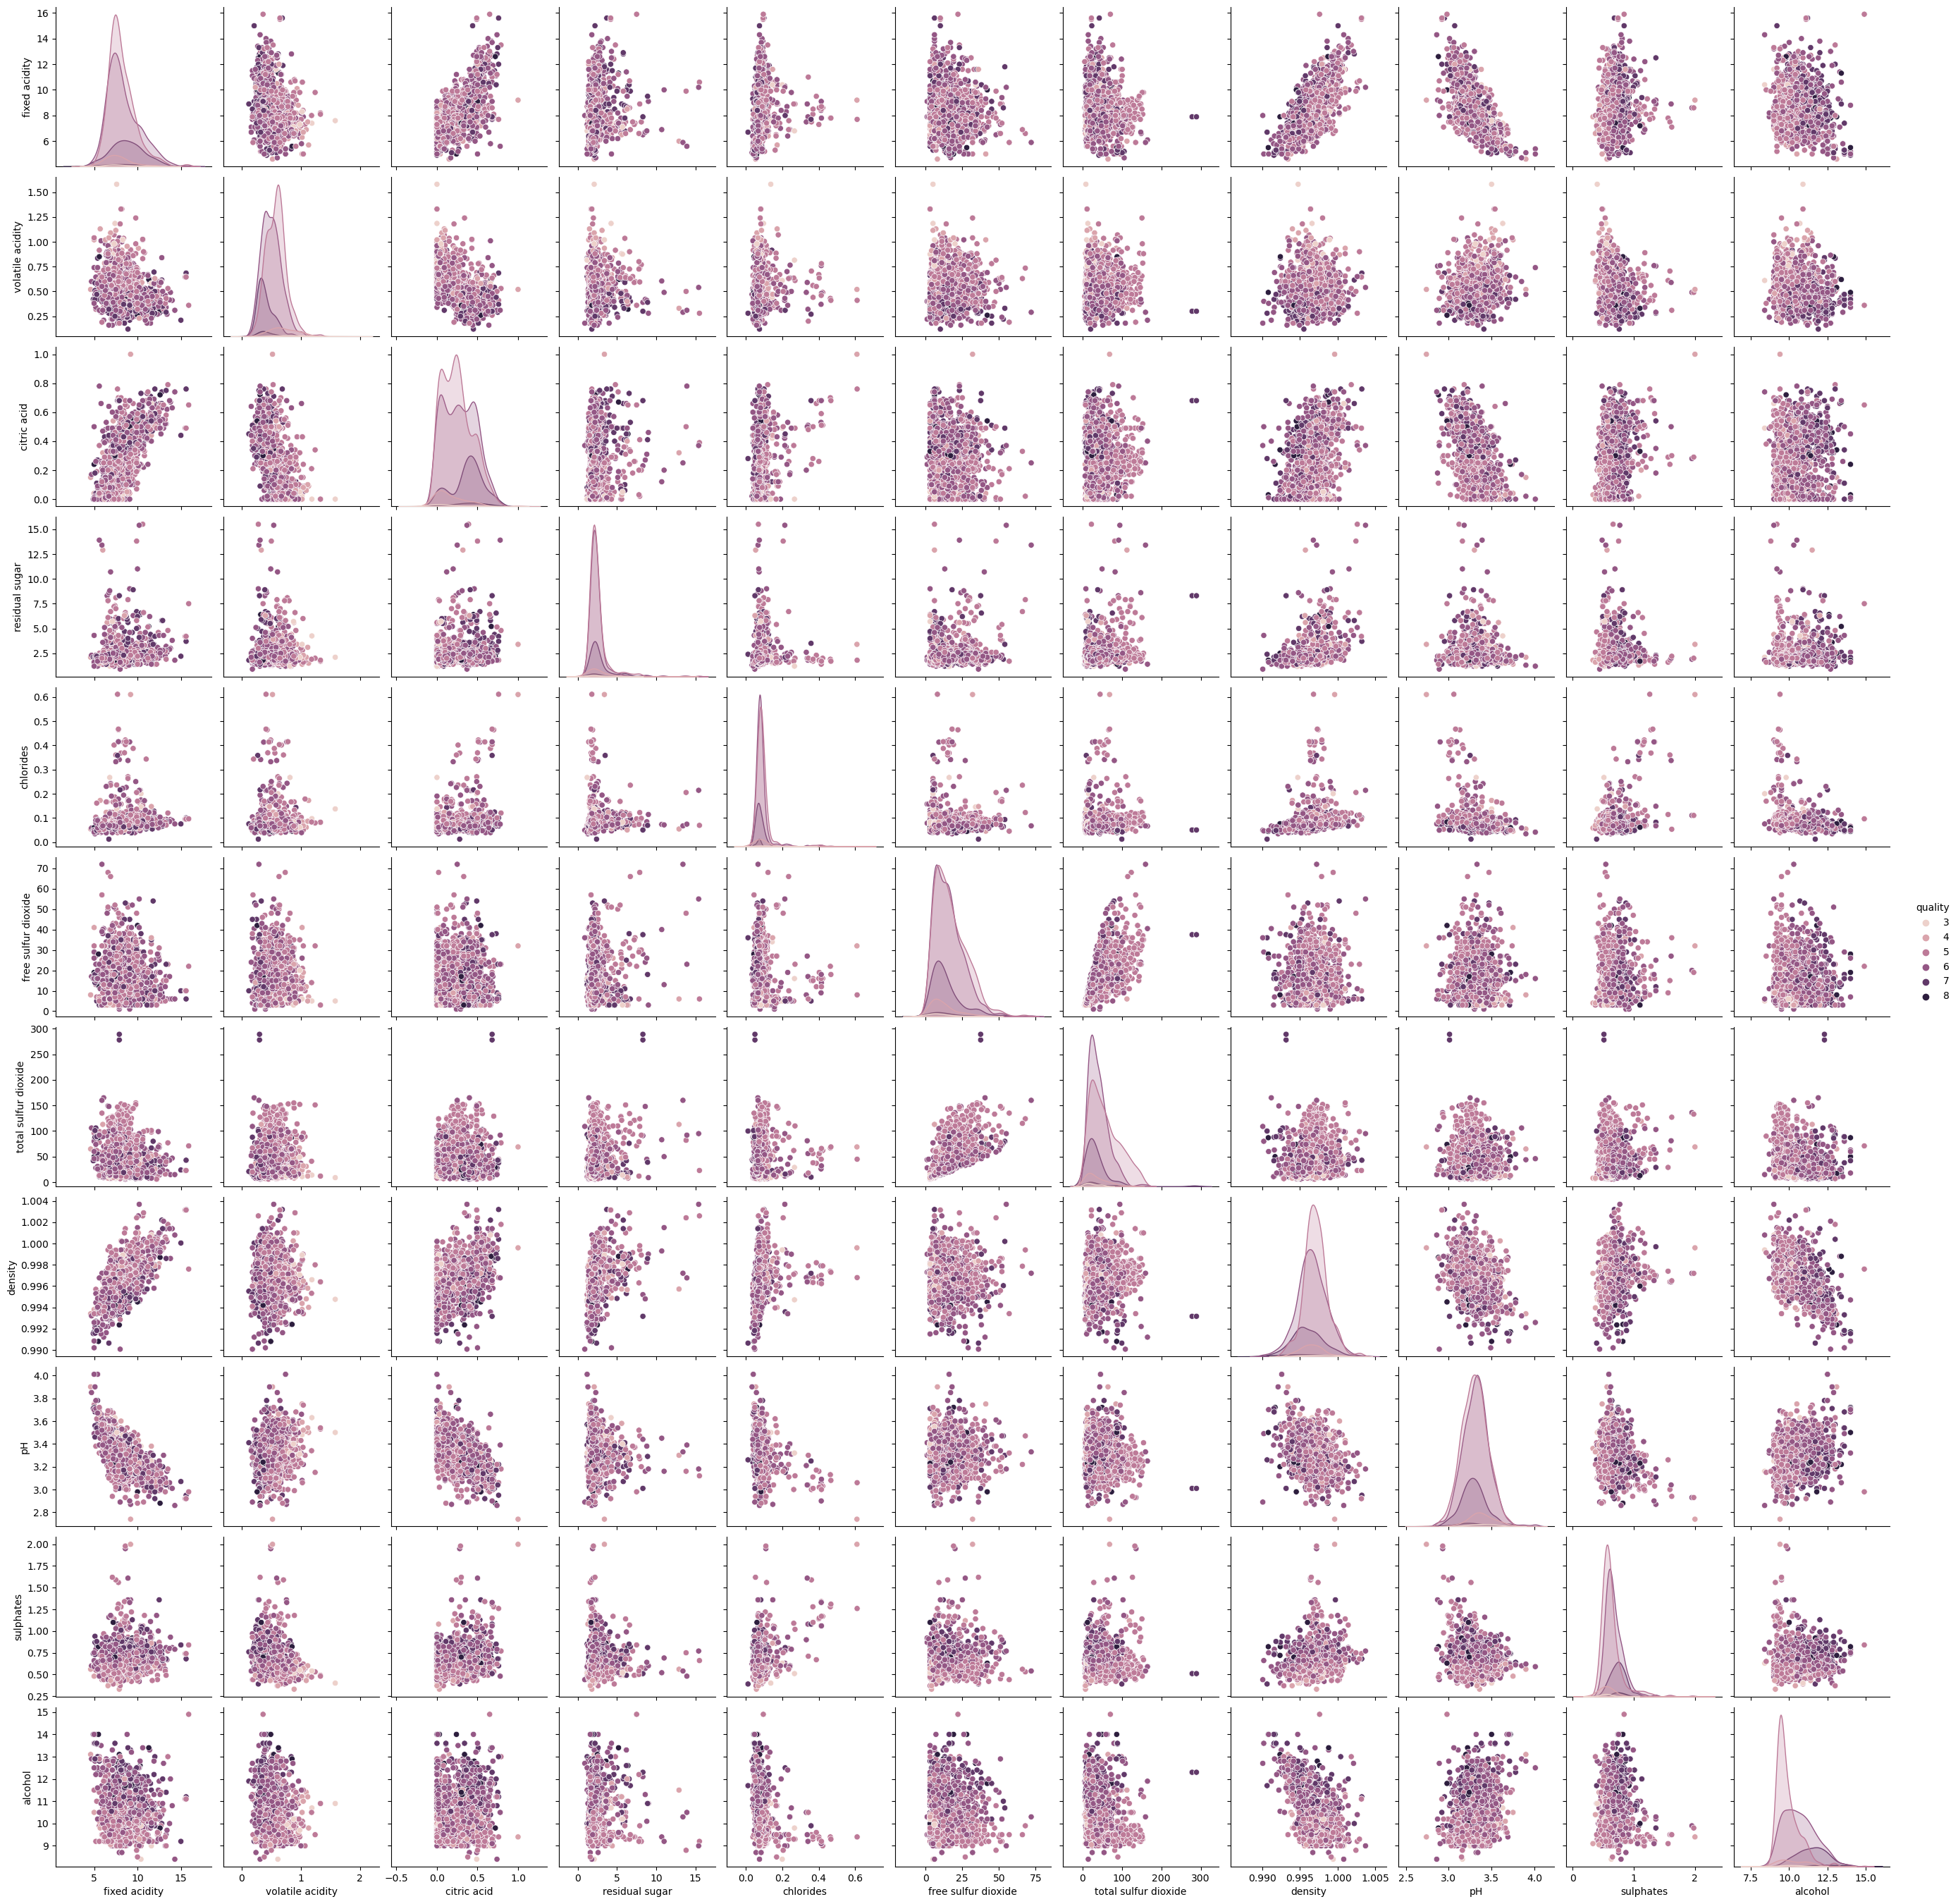

In [18]:
sns.pairplot(df, hue='quality', diag_kind='kde')
plt.show()

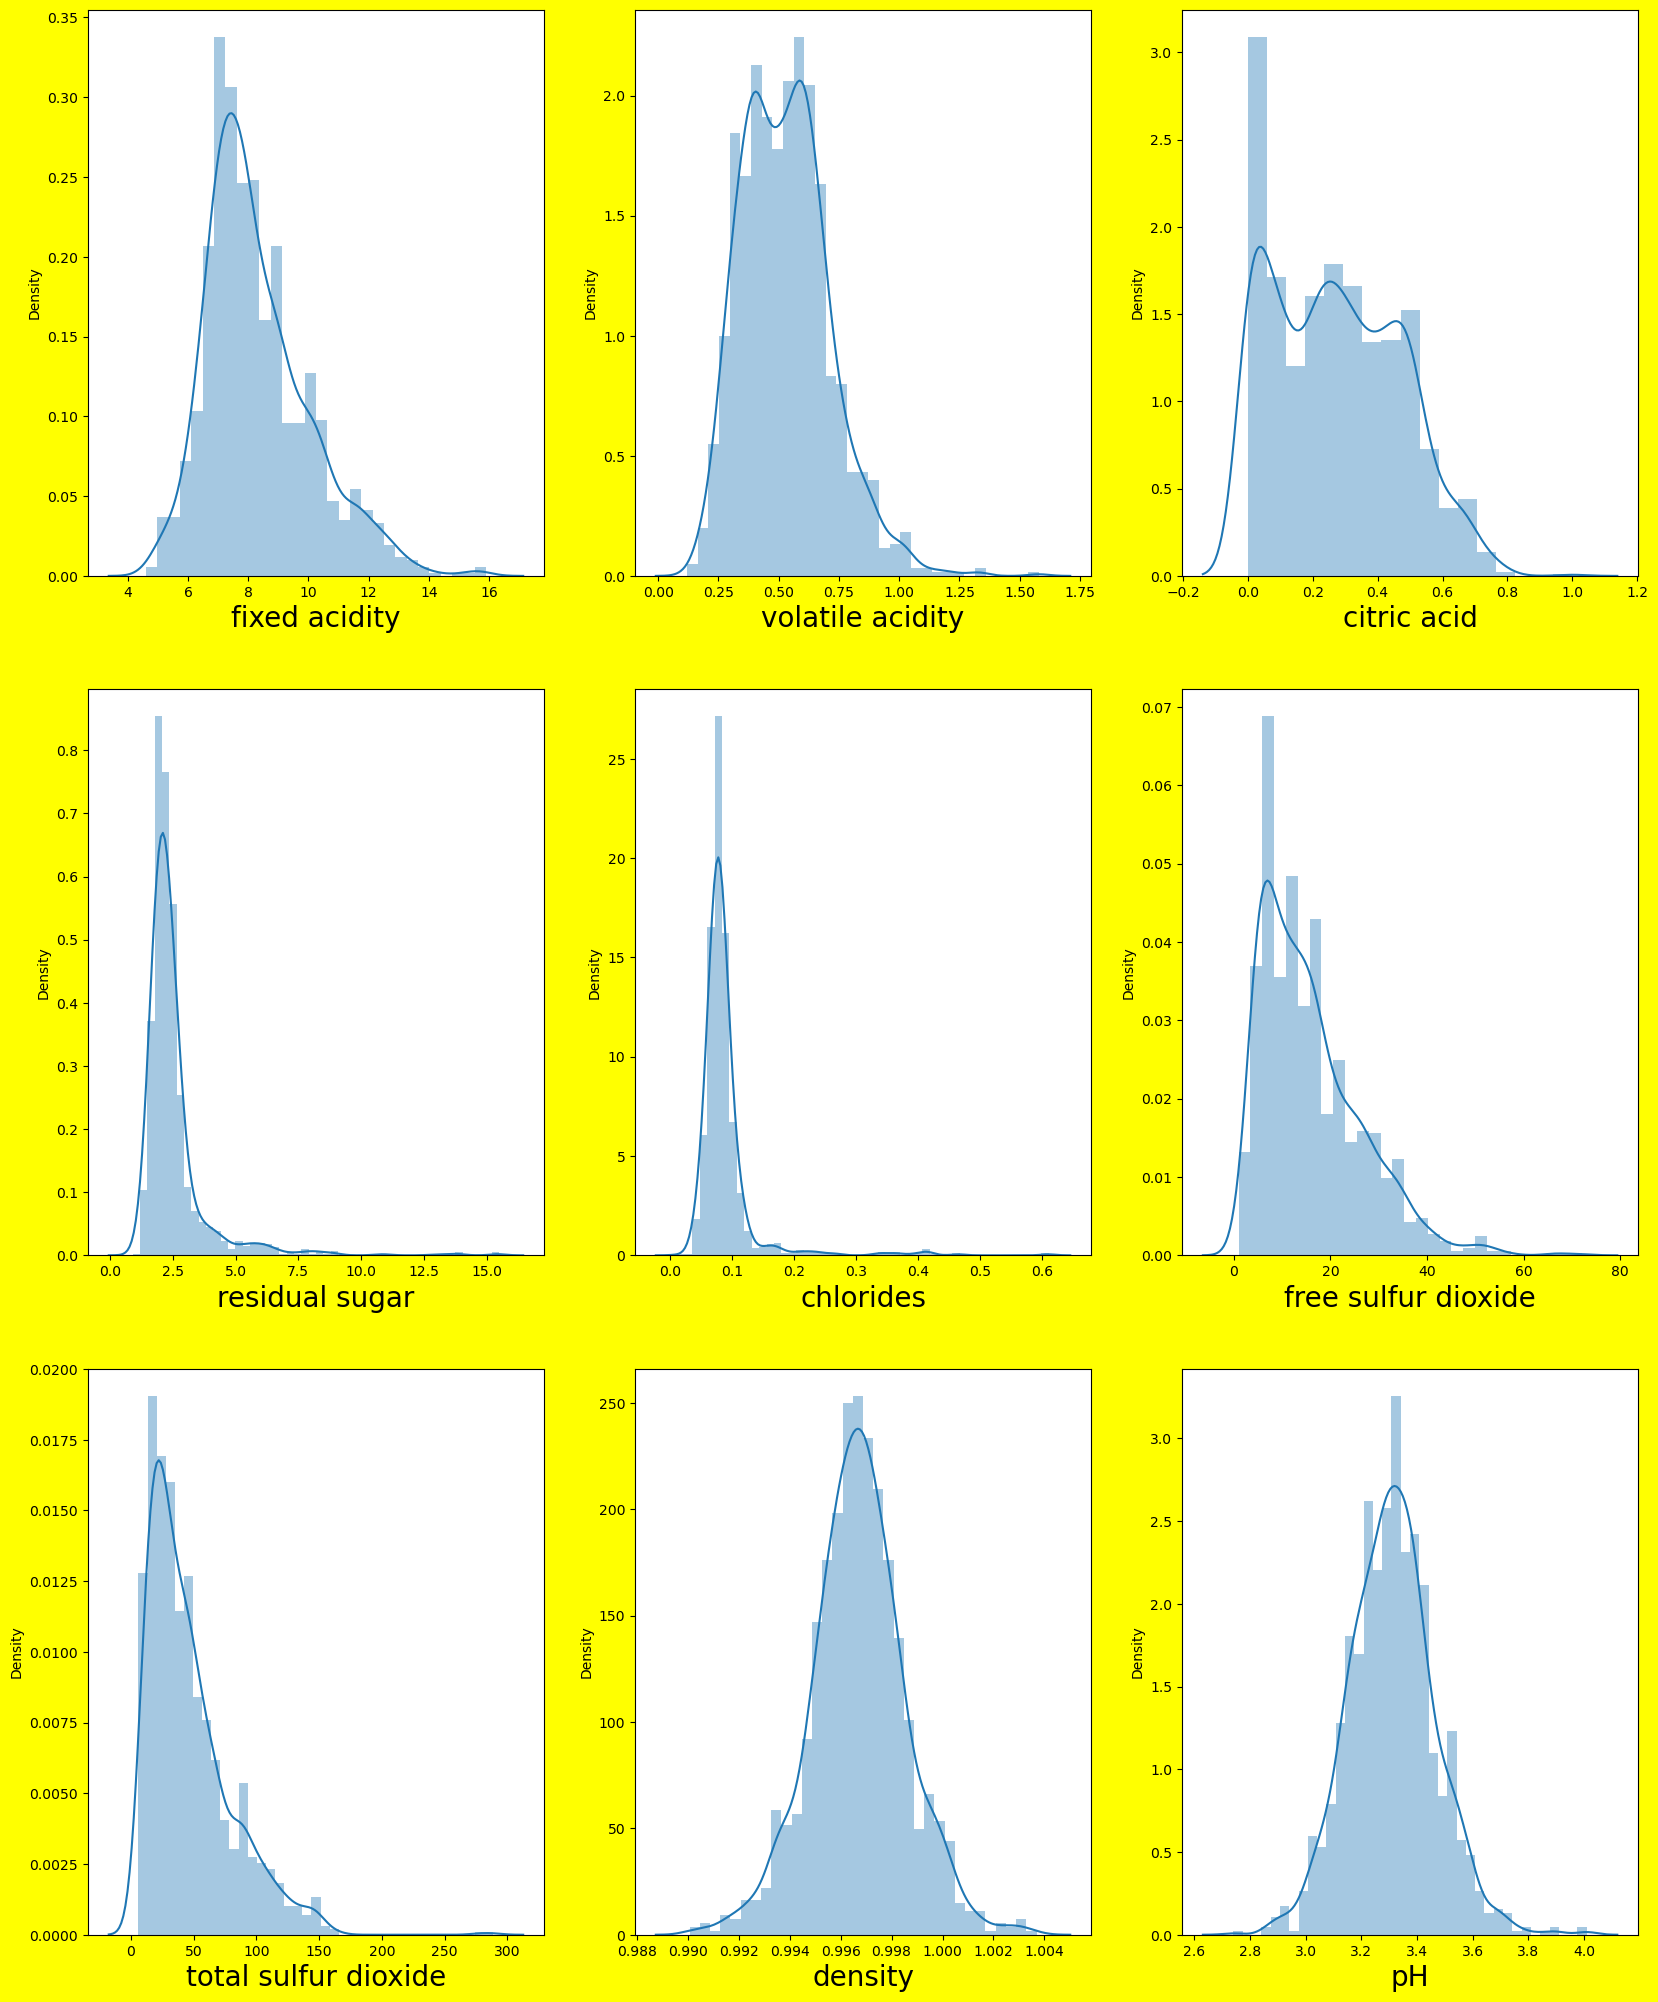

In [19]:
# Let's see how data is distributed for every column 
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=9:         
        ax = plt.subplot (3,3,plotnumber) 
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber+=1
plt.show()

We can see there is some skewness in the data.

In [20]:
df_features= df.drop('quality',axis=1)

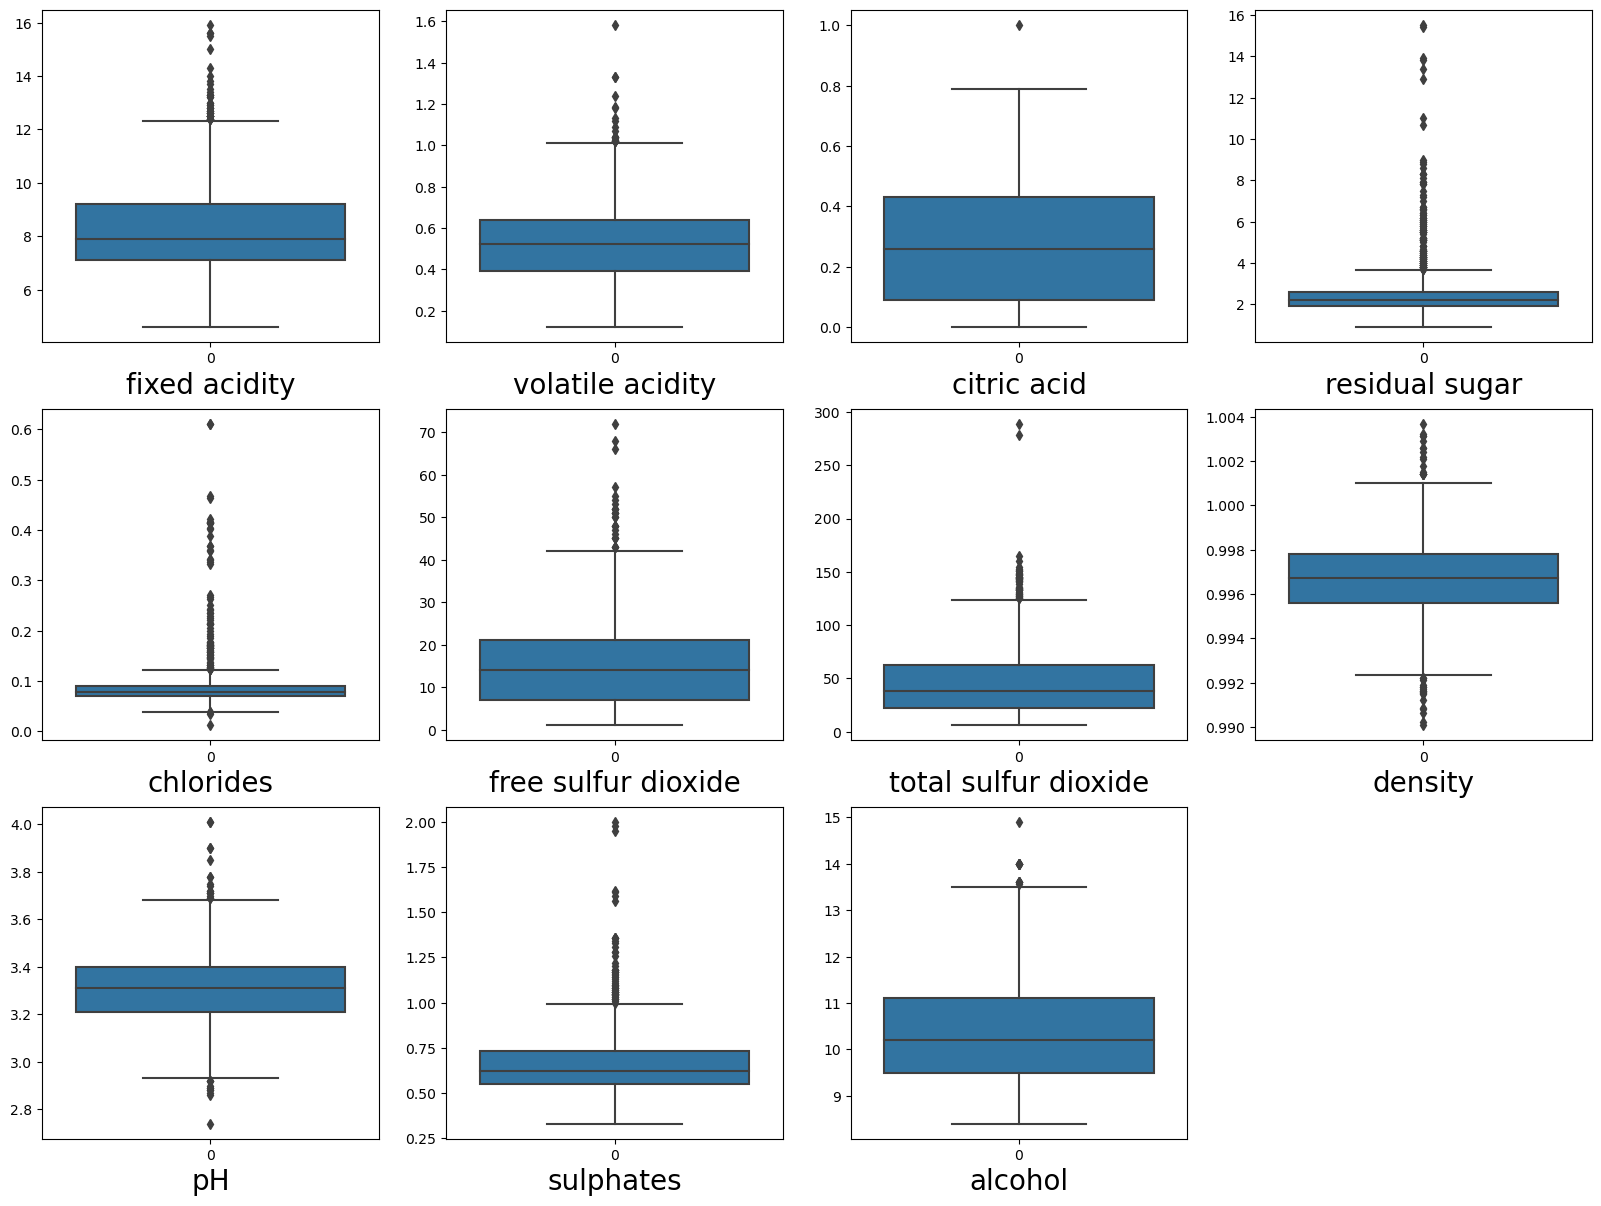

In [21]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=13:        
        plt.subplot (5,4,graph) 
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

so we have found outlier in all columns.

So, removing the outliers using zscore and IQR technique

In [22]:
df.shape

(1359, 12)

In [23]:
out_features=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                 'total sulfur dioxide','density','pH','sulphates','alcohol']]

# 1st quantile
Q1=out_features.quantile (0.25)

# 3rd quantile
Q3=out_features.quantile (0.75)

#IQR
IQR=Q3- Q1

df2=df[~((df< (Q1-1.5 *IQR)) | (df> (Q3 + 1.5* IQR))).any (axis=1)]

In [24]:
df2.shape

(1019, 12)

In [25]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 25.01839587932303


Now we will check with zscore

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(out_features))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
5          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1593       0.869983          0.494756     0.983977        0.461157   0.407702   
1594       1.215536          0.385444     0.983977        0.387183   0.038015   
1595       1.388312          0.112167     0.881656        0.239233   0.529261   
1597       1.388312          0.631395     0.779336        0.387183   0.265883   
1598       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.468554              0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737  0.708395   
2                0.085537              0.214813  0.155790  0.321247   
3                0.105971              0.394471  0.691057  0.966495   
5                0.277045              0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1593             1.159265              0.264277  0.106490  0.711149   
1594             1.542281              0.084619  0.968269  0.904724   
1595             2.212559              0.124983  0.850510  1.356397   
1597             1.542281              0.084619  0.663167  1.679021   
1598             0.201725              0.144505  0.652461  0.517575   

      sulphates   alcohol  
0      0.578561  0.954374  
1      0.124822  0.584575  
2      0.051024  0.584575  
3      0.461331  0.584575  
5      0.578561  0.954374  
...         ...       ...  
1593   0.945435  0.861924  
1594   0.461331  0.062574  
1595   0.593744  0.709723  
1597   0.300667  0.214775  
1598   0.007591  0.524824  

[1359 rows x 11 columns]

In [27]:
#threshold =3
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [28]:
# now removing the data above Zscore and creating new DF
df1 = df[(z<3).all(axis=1)]
df1.shape

(1239, 12)

In [29]:
#Shape of old and New Dataframe
print("old Data Frame- ",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame-  1359
New Data Frame- 1239


In [30]:
print("Data Loss Percentage After removing outliers with ZSCORE method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with ZSCORE method- 8.830022075055188


In [31]:
df=df1

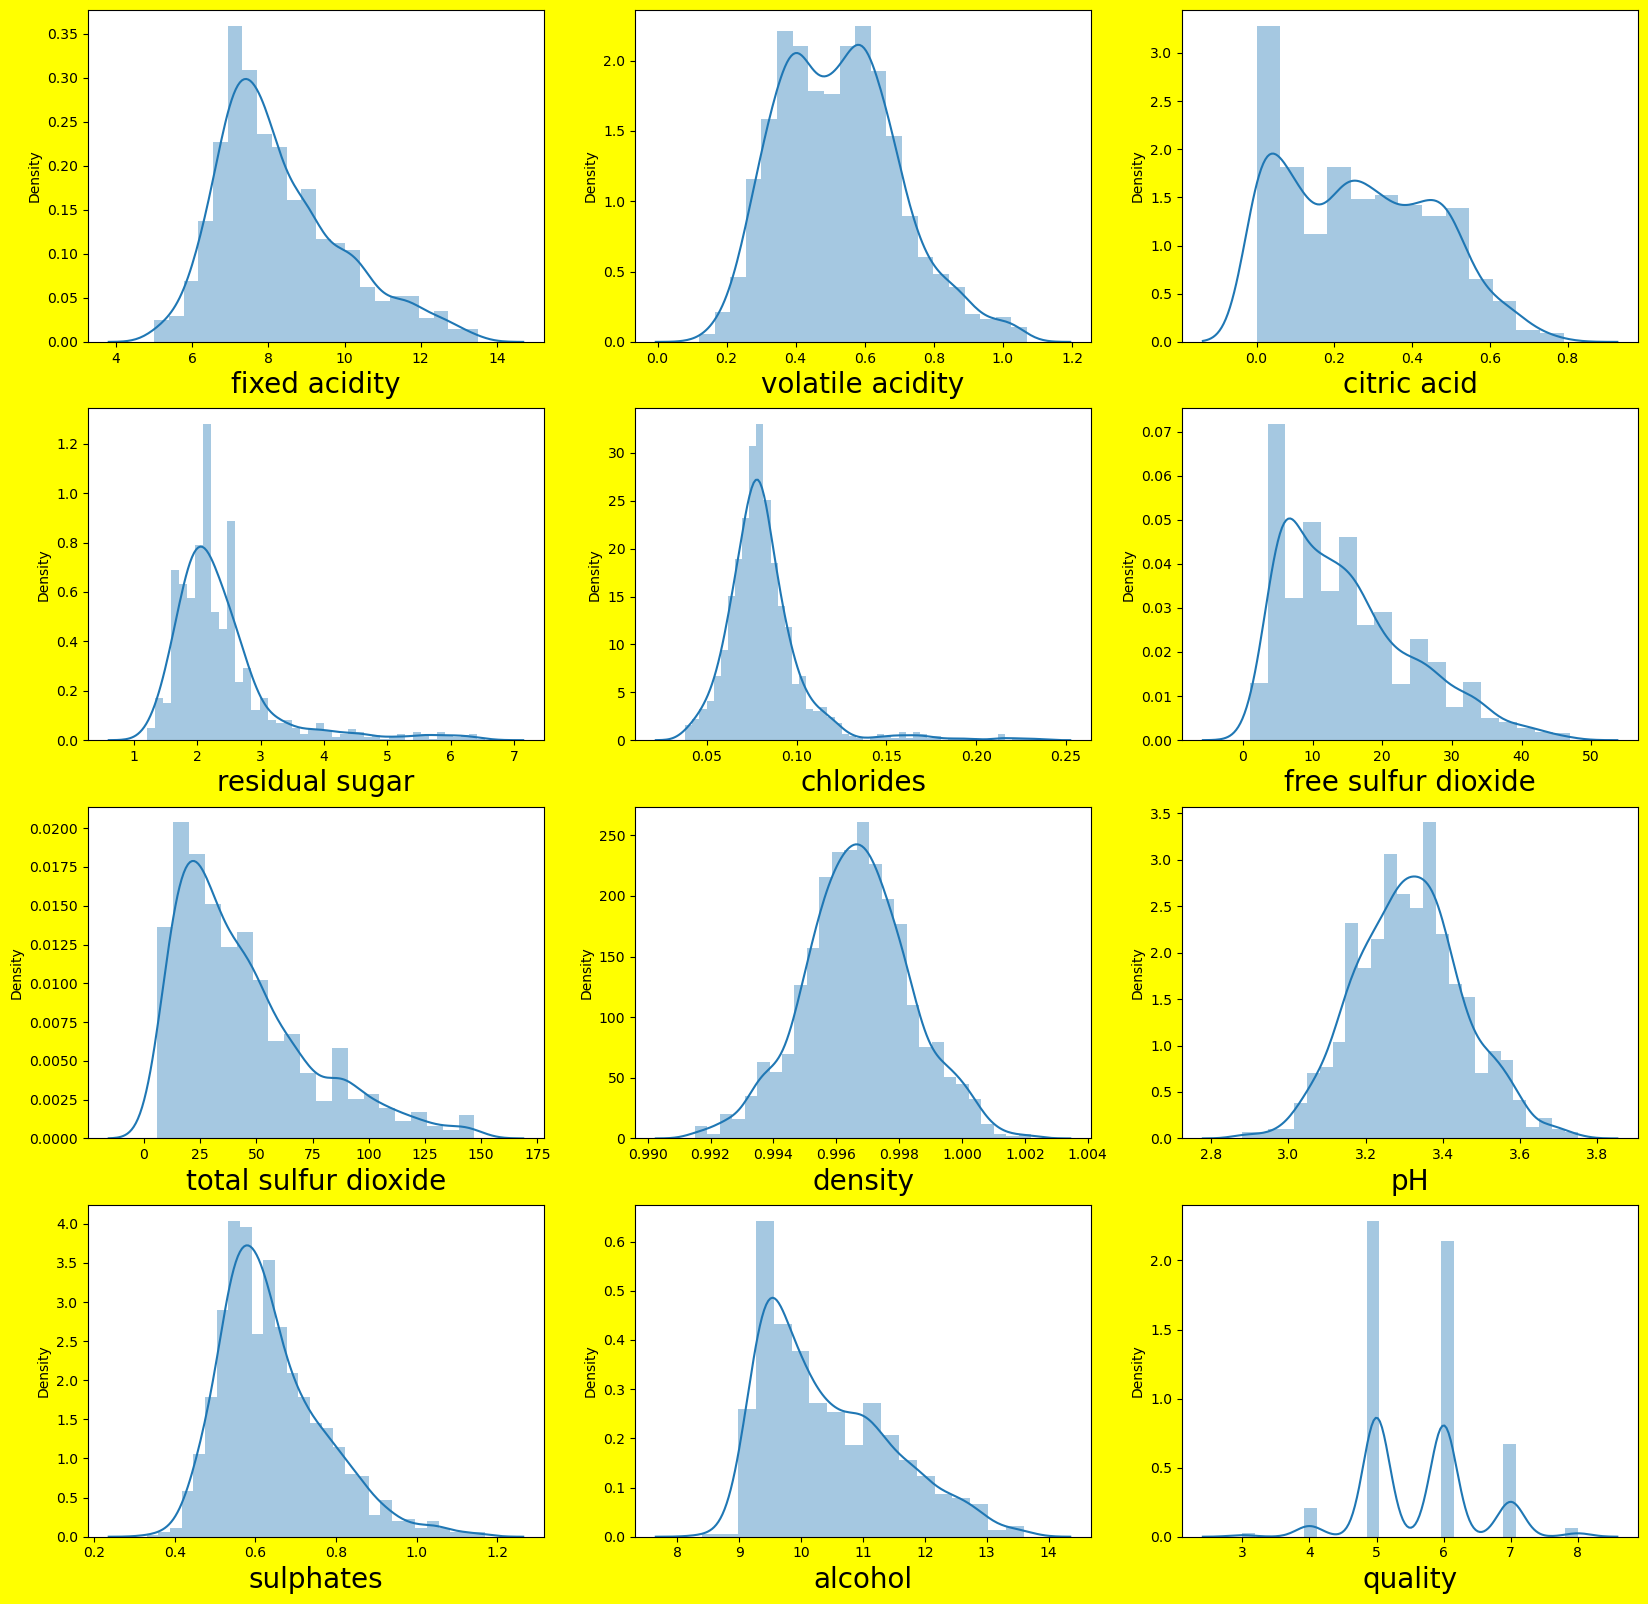

In [32]:
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=15:         
        ax = plt.subplot (5,3,plotnumber) 
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data almost looks normal in all the columns except residual sugar,chlorides, total sulpher dioxide.

In [33]:
# checking for skewness
df.skew()                # range is -0.5 to +0.5

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

As we can see there is skewness so we will remove it using cuberoot method


In [34]:
skewed_columns = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

We have removed the skewness now checking again.

In [35]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.530428
chlorides               1.192574
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.574020
alcohol                 0.653481
quality                 0.229533
dtype: float64

As we can see skewness is still present , We will try to remove it using squareroot method.

In [36]:
for column in ['residual sugar', 'chlorides','sulphates','alcohol']:
    df[column] = np.sqrt(df[column])

In [37]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.328773
chlorides               0.907856
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.626101
quality                 0.229533
dtype: float64

In [38]:
skewed_columns = ['residual sugar', 'chlorides', 'alcohol']

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [39]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.229778
chlorides               0.770681
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.612515
quality                 0.229533
dtype: float64

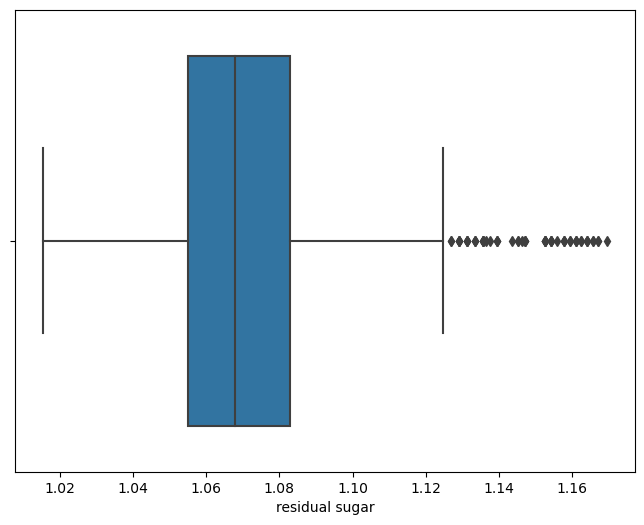

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='residual sugar', data=df)
plt.show()

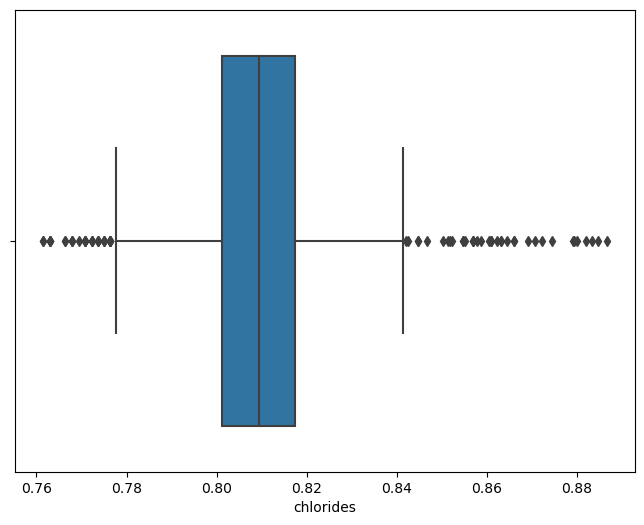

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='chlorides', data=df)
plt.show()

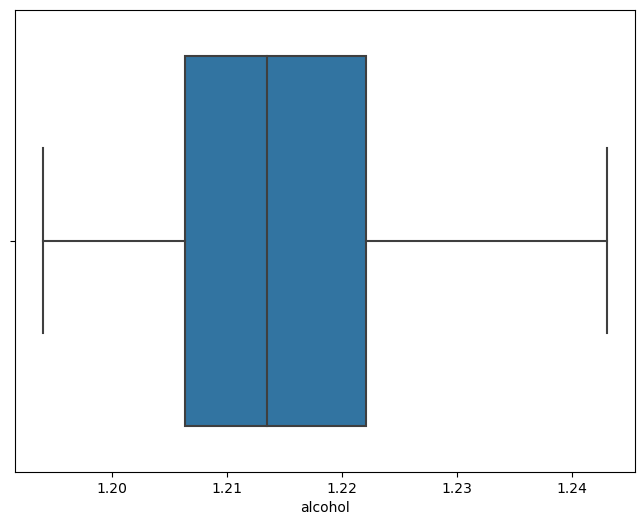

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='alcohol', data=df)
plt.show()

In [43]:
# Applying exponential transformation
skewed_columns = ['residual sugar', 'chlorides', 'alcohol']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [44]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.337807
chlorides               0.883011
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.629094
quality                 0.229533
dtype: float64

In [45]:
# Apply square transformation
skewed_columns = ['residual sugar', 'chlorides', 'alcohol']

for column in skewed_columns:
    df[column] = df[column] ** 2

In [46]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.447519
chlorides               0.997844
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.645777
quality                 0.229533
dtype: float64

In [50]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.000000
quality                 0.229533
dtype: float64

We have removed skewness.

In [48]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.251585
chlorides               0.806887
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.615169
quality                 0.229533
dtype: float64

In [49]:
from scipy.stats import boxcox

# Applying Box-Cox transformation
skewed_columns = ['residual sugar', 'chlorides', 'alcohol']

for column in skewed_columns:
    df[column], _ = boxcox(df[column] + 1)
    

In [60]:
df.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.481079
alcohol                 0.000000
quality                 0.229533
dtype: float64

In [51]:
# now checking the correlation between features using Corr()
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295352     0.690594   
volatile acidity          -0.295352          1.000000    -0.586277   
citric acid                0.690594         -0.586277     1.000000   
residual sugar             0.216292          0.038745     0.179340   
chlorides                  0.217942          0.097676     0.092675   
free sulfur dioxide       -0.145792          0.020114    -0.079118   
total sulfur dioxide      -0.091657          0.102957    -0.004015   
density                    0.662862          0.009798     0.359234   
pH                        -0.720366          0.263937    -0.527456   
sulphates                  0.199870         -0.348459     0.319380   
alcohol                         NaN               NaN          NaN   
quality                    0.127460         -0.369907     0.239204   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.216292   0.217942            -0.145792   
volatile acidity            0.038745   0.097676             0.020114   
citric acid                 0.179340   0.092675            -0.079118   
residual sugar              1.000000   0.211910             0.039404   
chlorides                   0.211910   1.000000            -0.003902   
free sulfur dioxide         0.039404  -0.003902             1.000000   
total sulfur dioxide        0.121945   0.110075             0.749664   
density                     0.388305   0.404142            -0.026983   
pH                         -0.077260  -0.208186             0.102321   
sulphates                   0.045633  -0.005539             0.044565   
alcohol                          NaN        NaN                  NaN   
quality                     0.035182  -0.171351            -0.065214   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.091657  0.662862 -0.720366   0.199870   
volatile acidity                  0.102957  0.009798  0.263937  -0.348459   
citric acid                      -0.004015  0.359234 -0.527456   0.319380   
residual sugar                    0.121945  0.388305 -0.077260   0.045633   
chlorides                         0.110075  0.404142 -0.208186  -0.005539   
free sulfur dioxide               0.749664 -0.026983  0.102321   0.044565   
total sulfur dioxide              1.000000  0.137502 -0.003992  -0.019654   
density                           0.137502  1.000000 -0.321350   0.124299   
pH                               -0.003992 -0.321350  1.000000  -0.042852   
sulphates                        -0.019654  0.124299 -0.042852   1.000000   
alcohol                                NaN       NaN       NaN        NaN   
quality                          -0.204333 -0.190830 -0.082619   0.392610   

                      alcohol   quality  
fixed acidity             NaN  0.127460  
volatile acidity          NaN -0.369907  
citric acid               NaN  0.239204  
residual sugar            NaN  0.035182  
chlorides                 NaN -0.171351  
free sulfur dioxide       NaN -0.065214  
total sulfur dioxide      NaN -0.204333  
density                   NaN -0.190830  
pH                        NaN -0.082619  
sulphates                 NaN  0.392610  
alcohol                   NaN       NaN  
quality                   NaN  1.000000

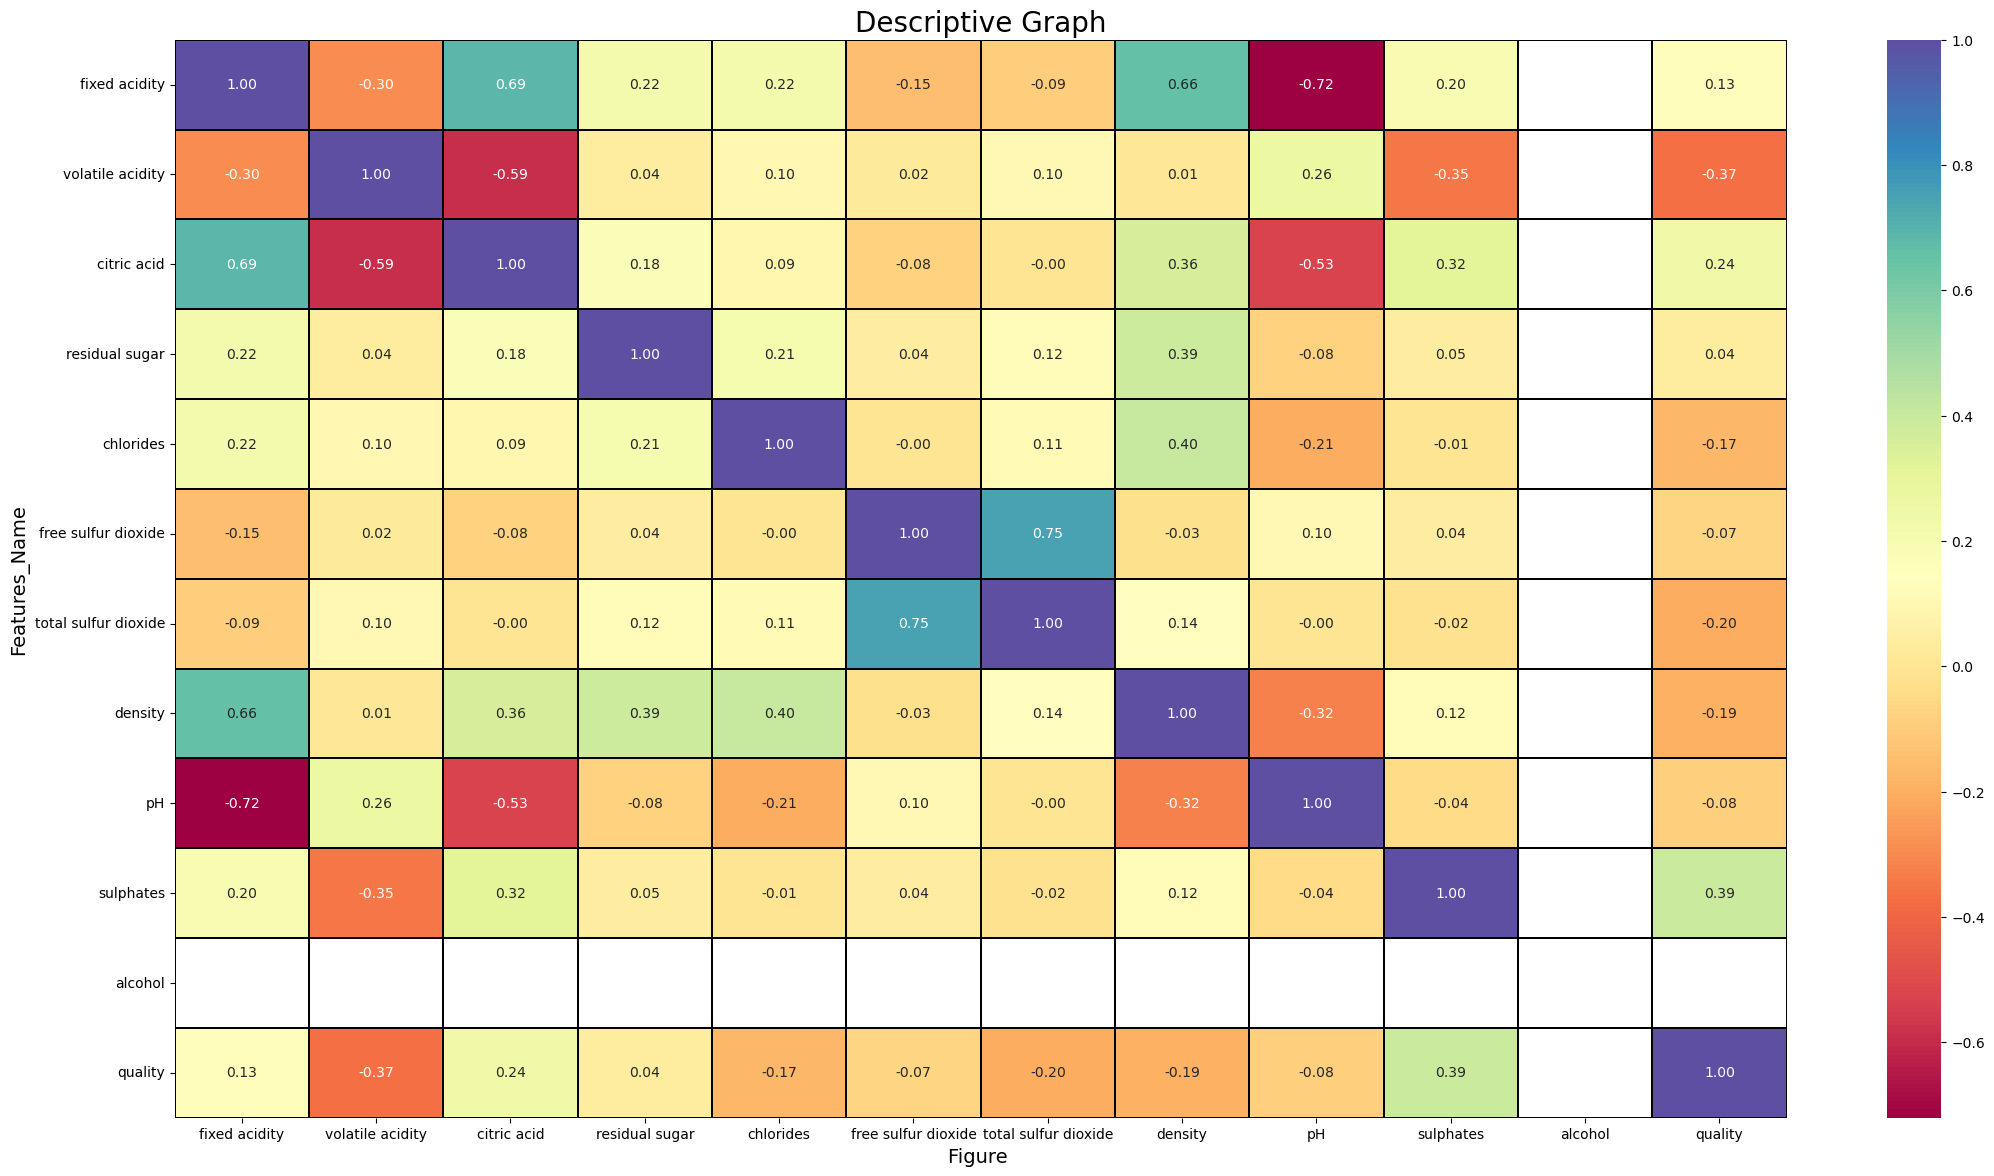

In [52]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linewidth=0.2,linecolor="black", cmap= 'Spectral') 
plt.xlabel('Figure ', fontsize=14)
plt.ylabel('Features_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

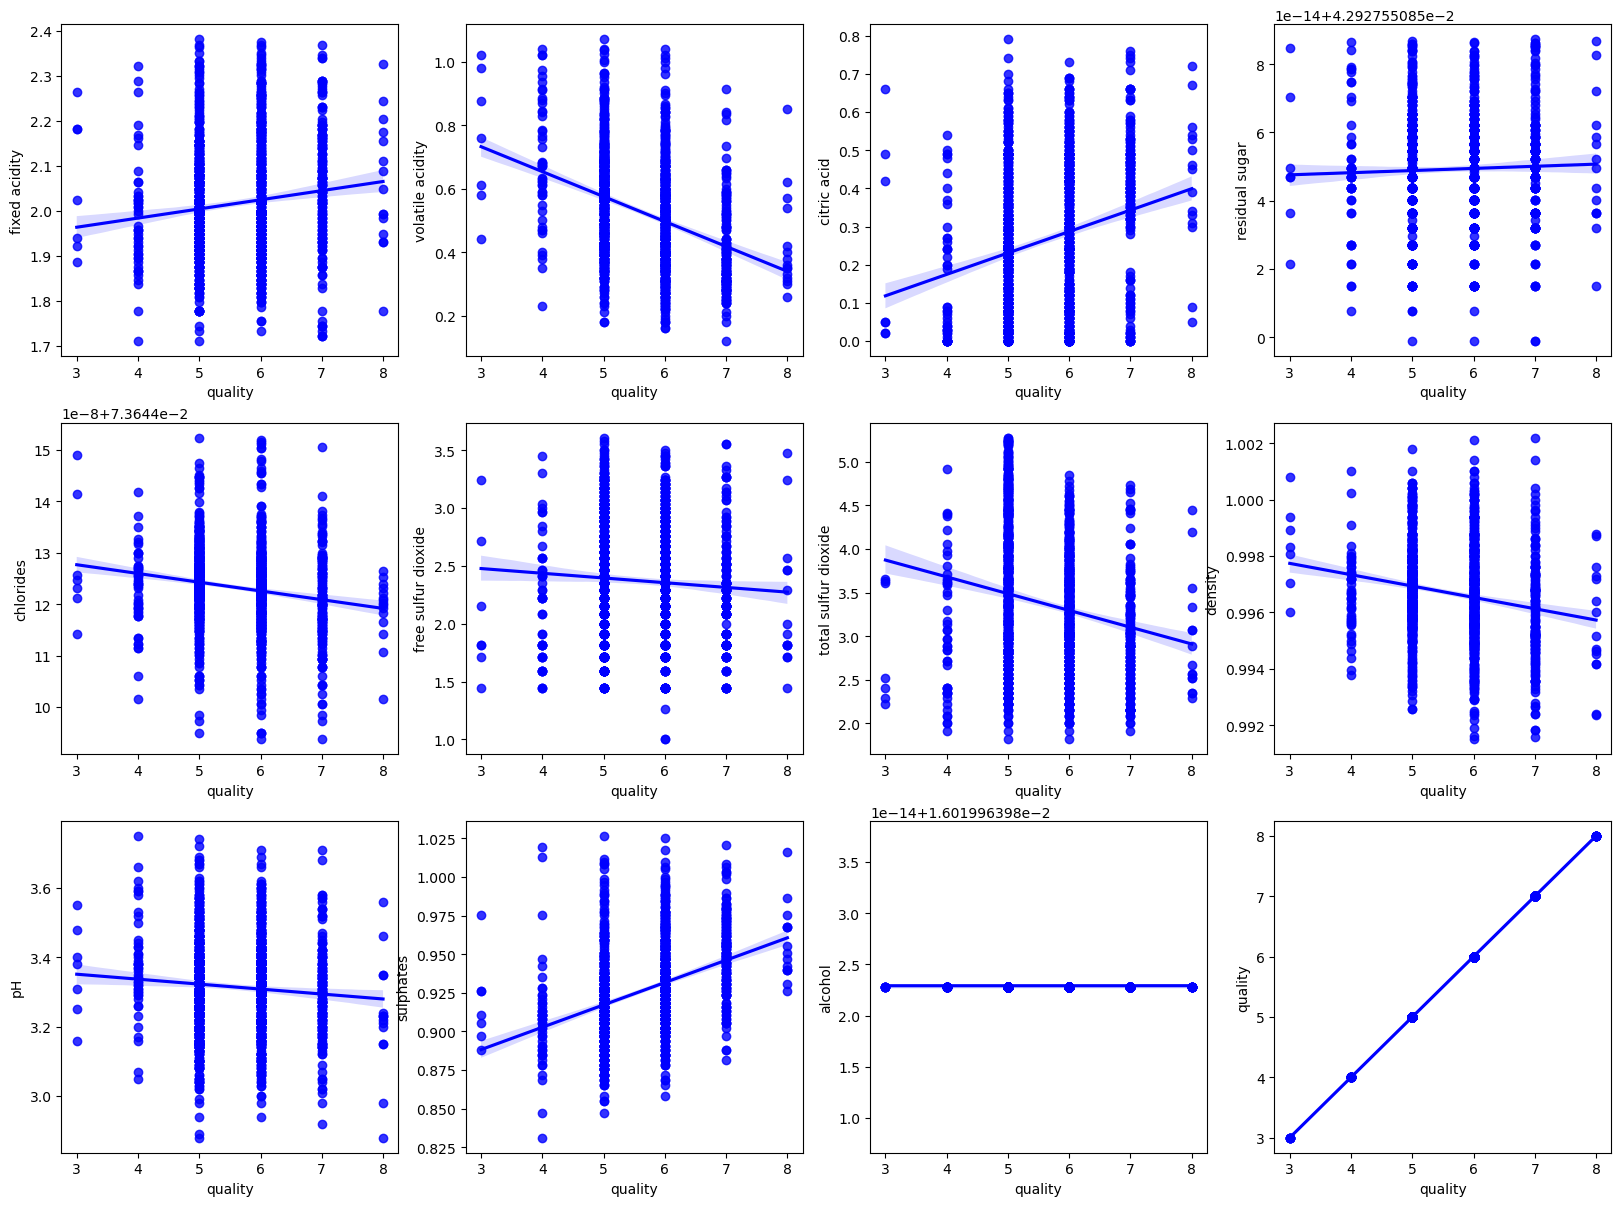

In [63]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<= 17:
        
        plt.subplot(5,4,p)
        sns.regplot(x='quality',y=i,data=df,color='b')
        plt.xlabel("quality")
        plt.ylabel(i)
        
    p+=1
plt.show()


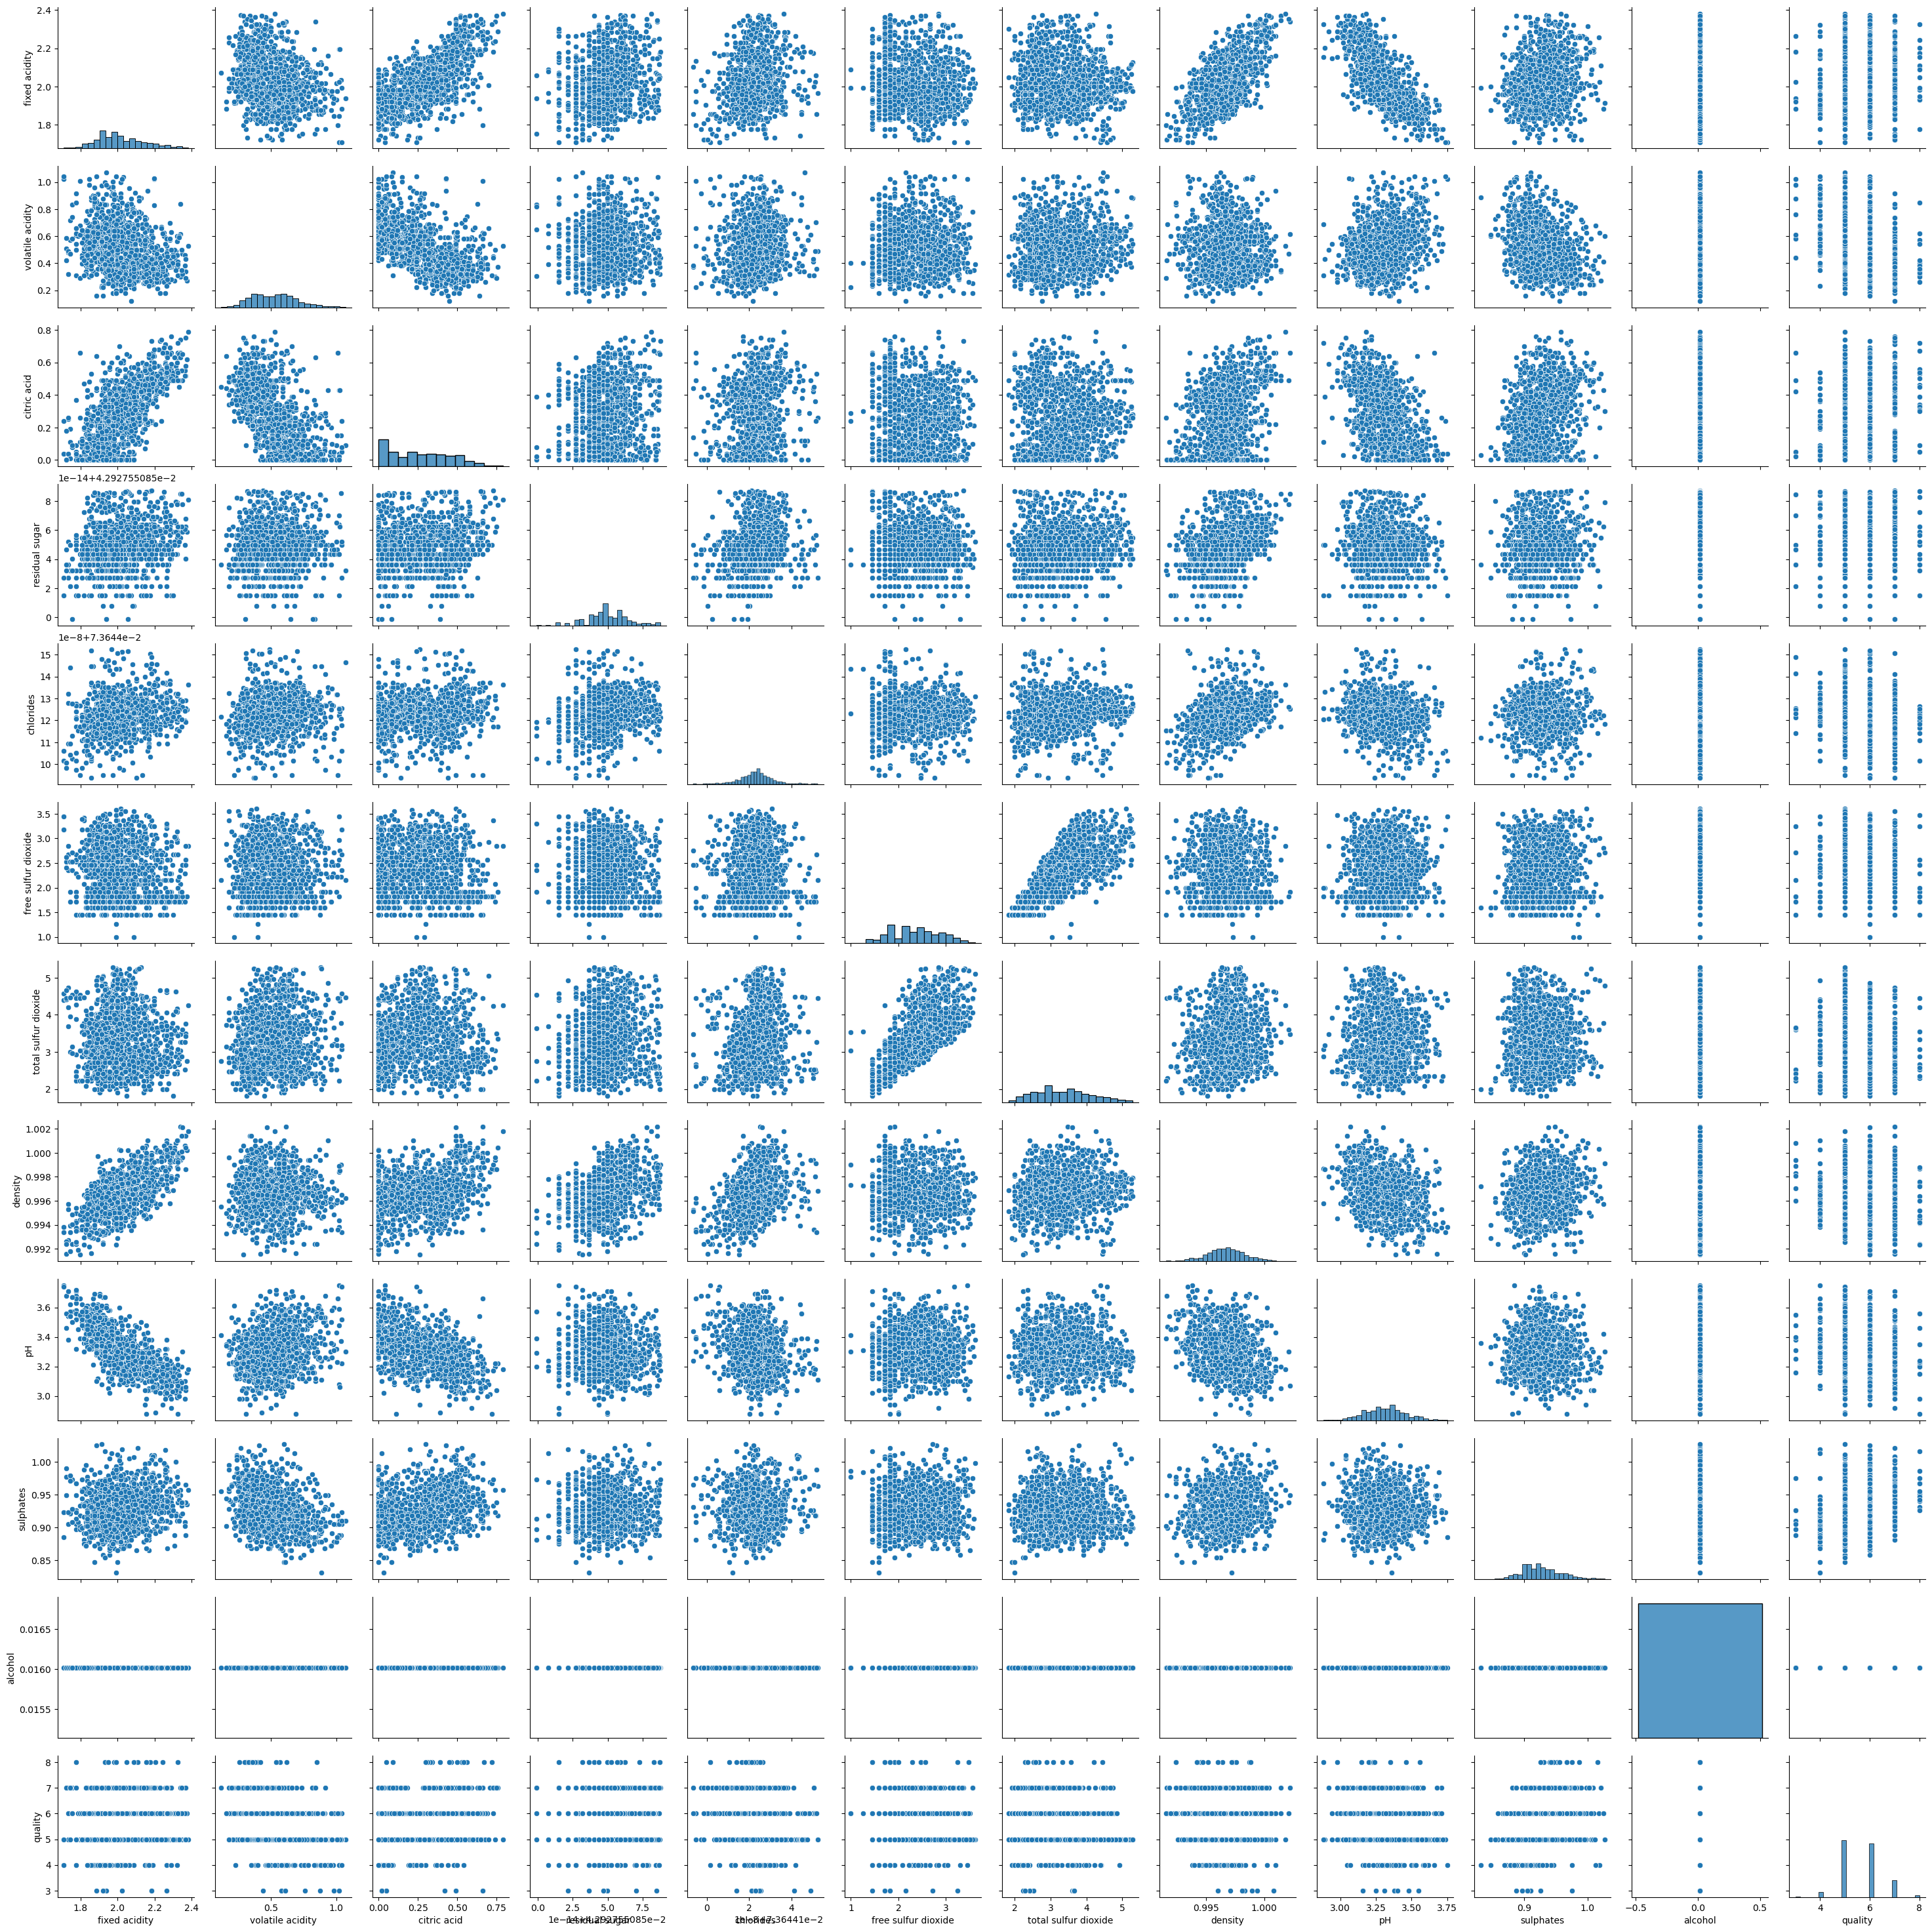

In [64]:
sns.pairplot(data=df,palette='Dark2')

In [83]:
# Seperating the independent and target variables into x and y
x = df1.drop('quality',axis=1)
y= df1['quality']

print('Features Dimension = ',x.shape)

print('Features Dimension = ',y.shape)

Features Dimension =  (1239, 11)
Features Dimension =  (1239,)


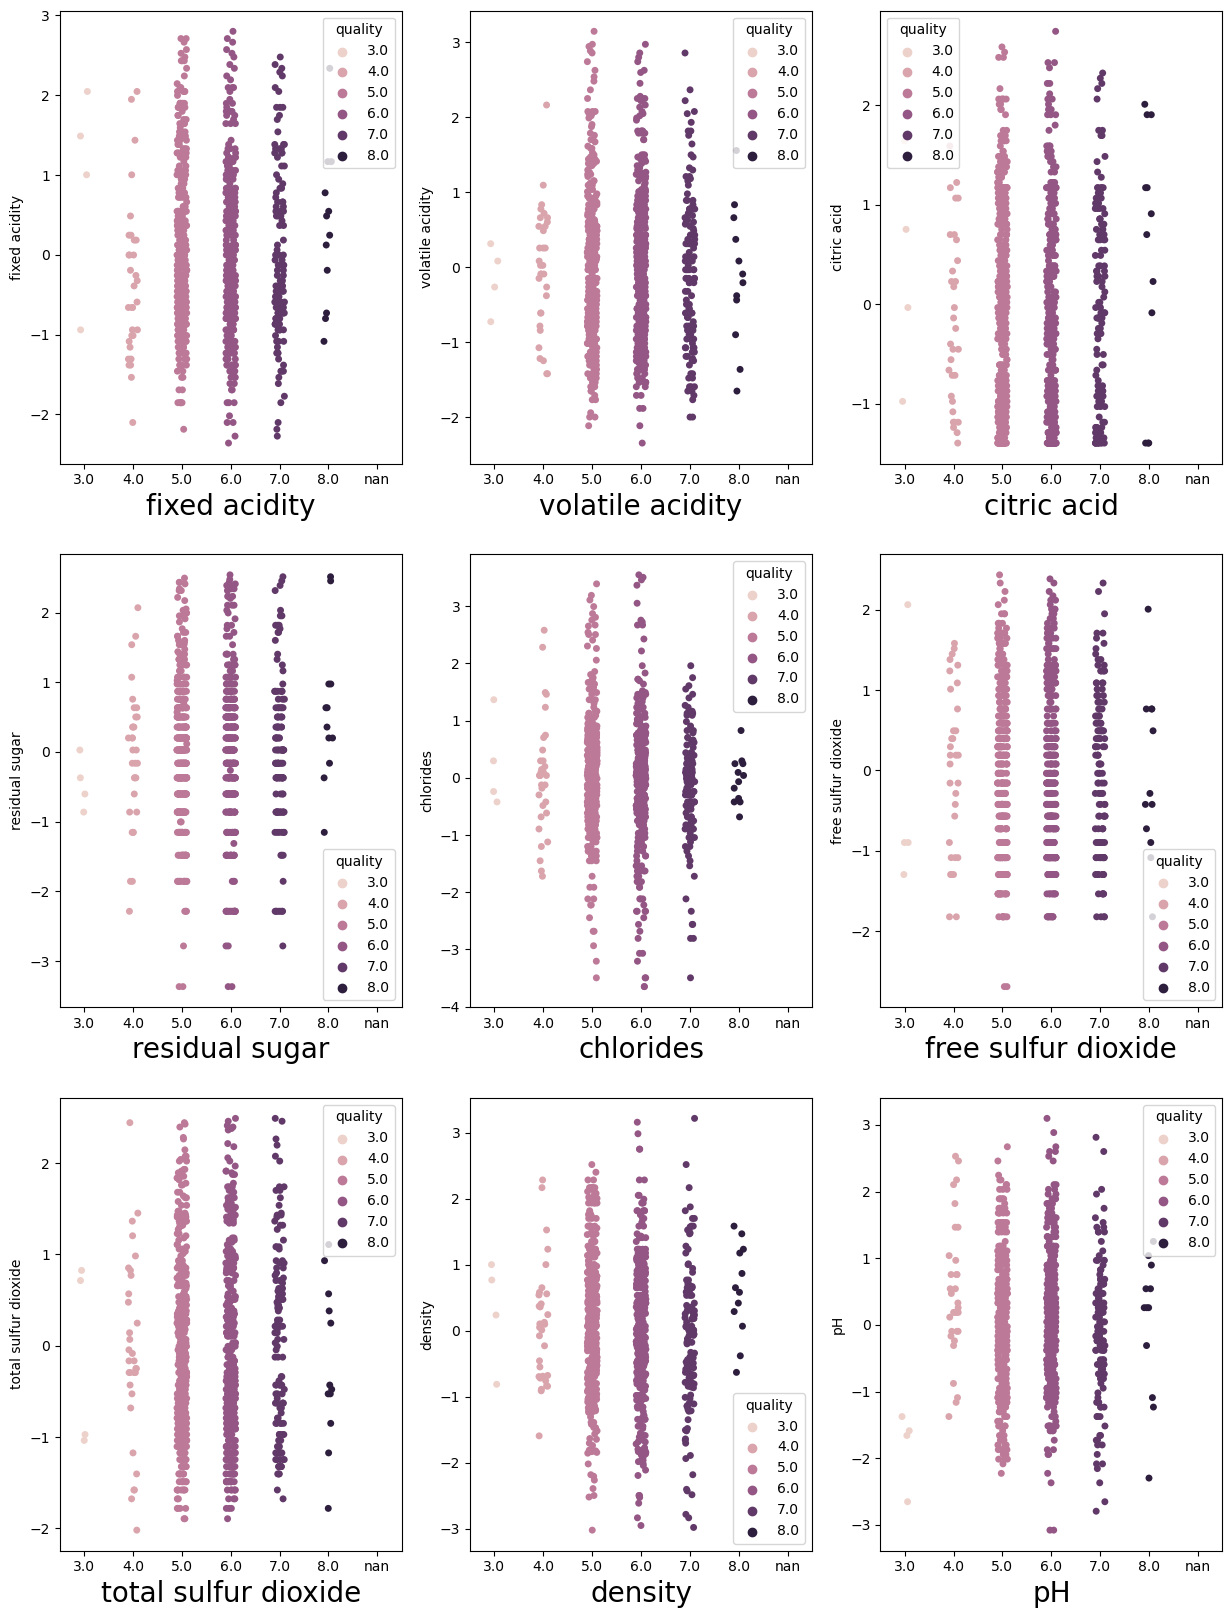

In [86]:
#Before we fit data to a model, let's visualize the relationship between our independent variables and the categories.

#We'll see how features are related to class

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:         # as there are 9 columns in the data
        ax = plt.subplot (3,3,plotnumber) 
        sns.stripplot(x=y,y=x[column],hue=y)
        plt.xlabel(column, fontsize=20)
    
    plotnumber+=1
plt.show()

In [87]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.523464          1.009464    -1.392862       -0.602691  -0.123450   
1         -0.258177          2.050338    -1.392862        0.634637   0.906344   
2         -0.258177          1.356422    -1.183521        0.200853   0.662162   
3          1.696526         -1.419242     1.537914       -0.602691  -0.180639   
4         -0.523464          0.778159    -1.392862       -0.862034  -0.180639   
...             ...               ...          ...             ...        ...   
1234      -0.939948          0.546853    -0.974180       -0.602691  -0.615115   
1235      -1.381711          0.431201    -0.974180       -0.370721   0.575438   
1236      -1.613349          0.142069    -0.869509        0.028267  -1.043662   
1237      -1.613349          0.691419    -0.764839       -0.370721  -0.180639   
1238      -1.535282         -1.245763     1.066897        1.538856  -0.682591   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.285969             -0.165656  0.650860  1.394315   
1                1.088266              0.905298  0.068312 -0.806846   
2                0.189553              0.538142  0.184821 -0.380815   
3                0.395814              0.714179  0.767369 -1.090867   
4               -0.035961              0.069321  0.650860  1.394315   
...                   ...                   ...       ...       ...   
1234             1.309253             -0.006221 -0.100627  0.755268   
1235             1.580577              0.213163 -1.038529  0.968284   
1236             2.005408              0.445197 -0.910368  1.465320   
1237             1.580577              0.213163 -0.706477  1.820346   
1238             0.492908              0.142384 -0.694826  0.542253   

      sulphates  alcohol  
0     -0.614321      0.0  
1      0.380453      0.0  
2      0.146396      0.0  
3     -0.436903      0.0  
4     -0.614321      0.0  
...         ...      ...  
1234   1.370617      0.0  
1235  -0.436903      0.0  
1236   0.964998      0.0  
1237   0.606058      0.0  
1238   0.225397      0.0  

[1239 rows x 11 columns]

In [90]:
x_scaled = scaler.fit_transform(x)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [92]:
x_scaled.shape[1]

11

In [88]:
#Finding variance inflation factor in each scaled column i.e x_scaled.shape[1] (1/(1-R2))

In [96]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])] 
vif["Features"] = x.columns

#Let's check the values
vif

vif              Features
0   5.899446         fixed acidity
1   1.824353      volatile acidity
2   3.010597           citric acid
3   1.213970        residual sugar
4   1.268189             chlorides
5   2.560328   free sulfur dioxide
6   2.858034  total sulfur dioxide
7   2.958571               density
8   2.620438                    pH
9   1.217544             sulphates
10       NaN               alcohol

In [97]:
x.drop('fixed acidity',axis=1,inplace=True)

In [98]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

VIF values              Features
0    1.812273      volatile acidity
1    2.372404           citric acid
2    1.210447        residual sugar
3    1.241614             chlorides
4    2.485433   free sulfur dioxide
5    2.530811  total sulfur dioxide
6    1.633769               density
7    1.510044                    pH
8    1.214092             sulphates
9         NaN               alcohol

In [99]:
x_train,x_test,y_train, y_test = train_test_split(x_scaled, y, test_size= 0.30, random_state = 111)

In [108]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

Results for LinearRegression:
R2_score:  0.31687601597364246
R2_score on training Data: 35.654335430582705
Mean Absolute Error:- 0.5372066684313227
Mean Squared Error:- 0.4890775575023946
Root Mean Squared Error:- 0.6993408021146733
Cross-validation scores: [0.15214091 0.22845964 0.3300203  0.34155826 0.25173754]
Mean Cross-validation score: 0.2607833321371088
Difference between R2 score and cross-validation score is 5.609268383653365


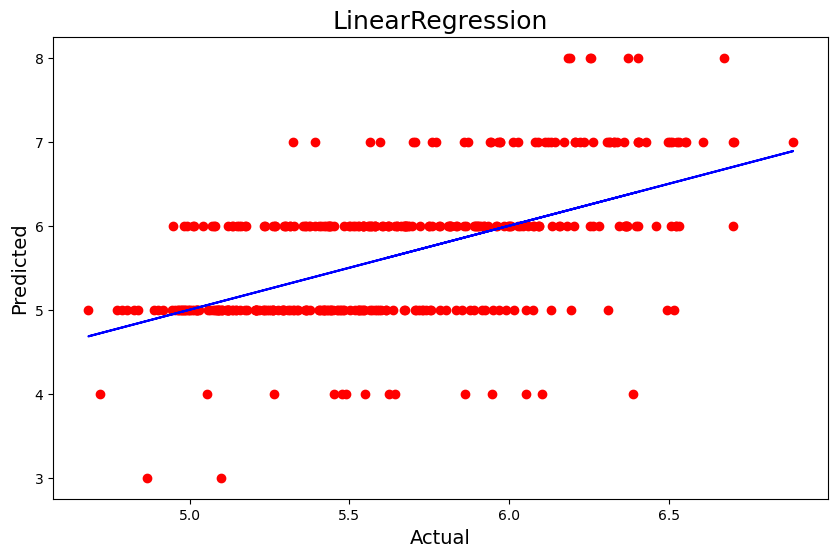



Results for RandomForestRegressor:
R2_score:  0.35146704617713864
R2_score on training Data: 90.4985827556974
Mean Absolute Error:- 0.5191935483870967
Mean Squared Error:- 0.4643123655913978
Root Mean Squared Error:- 0.6814047003003412
Cross-validation scores: [0.22908489 0.26993028 0.30753538 0.2471272  0.24439576]
Mean Cross-validation score: 0.2596146995779354
Difference between R2 score and cross-validation score is 9.185234659920322


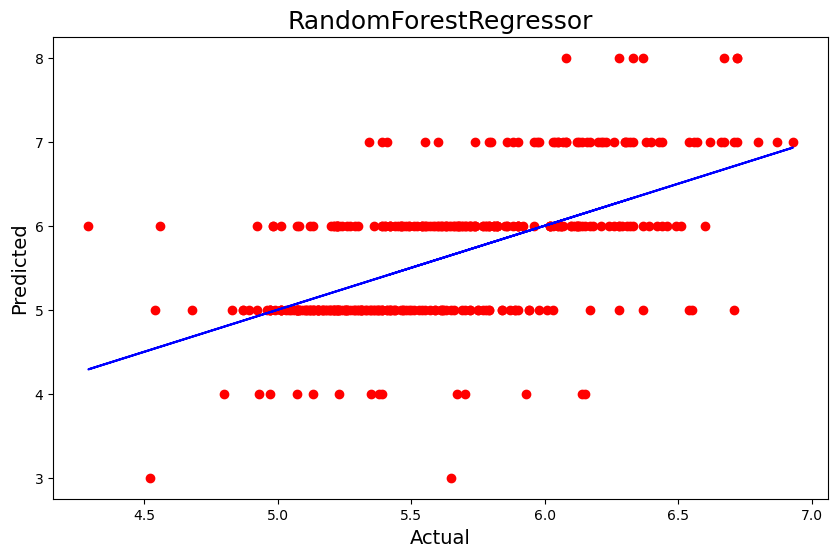



Results for DecisionTreeRegressor:
R2_score:  -0.26158970476911403
R2_score on training Data: 100.0
Mean Absolute Error:- 0.6397849462365591
Mean Squared Error:- 0.9032258064516129
Root Mean Squared Error:- 0.9503819266229829
Cross-validation scores: [-0.4359488  -0.58346184 -0.28832669 -0.61691198 -0.30395035]
Mean Cross-validation score: -0.4457199317188604
Difference between R2 score and cross-validation score is 18.413022694974636


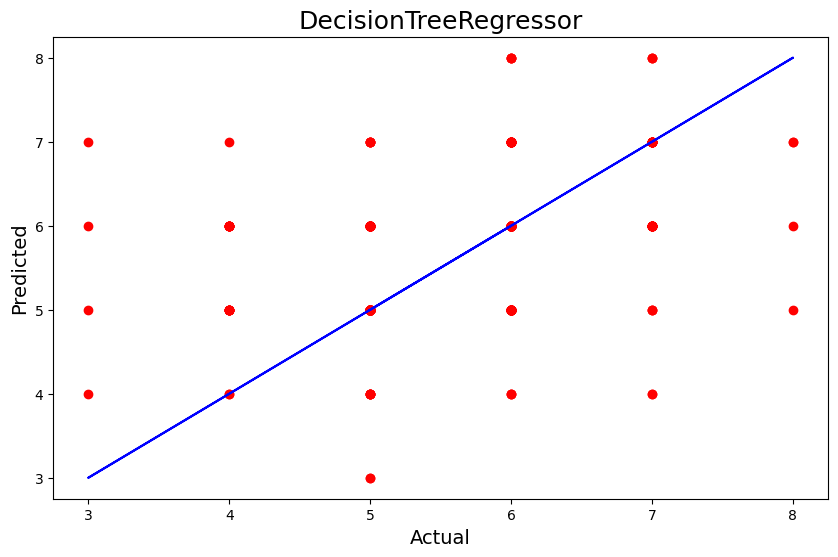



Results for KNeighborsRegressor:
R2_score:  0.2735345950037852
R2_score on training Data: 48.600284246746114
Mean Absolute Error:- 0.5510752688172044
Mean Squared Error:- 0.5201075268817204
Root Mean Squared Error:- 0.7211848077169405
Cross-validation scores: [0.0819242  0.15365459 0.35040604 0.13593204 0.11585806]
Mean Cross-validation score: 0.16755498265262675
Difference between R2 score and cross-validation score is 10.597961235115843


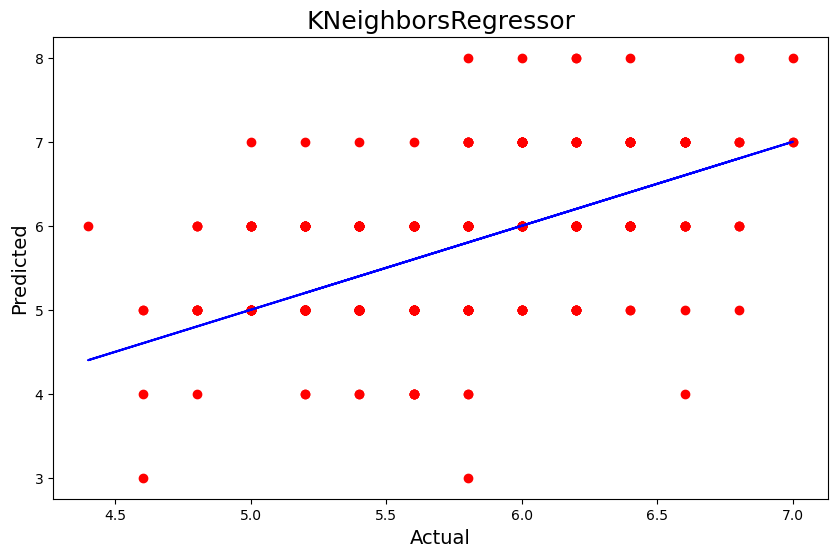



Results for Lasso:
R2_score:  -0.003988598297375745
R2_score on training Data: 0.0
Mean Absolute Error:- 0.7131469286006623
Mean Squared Error:- 0.7187982019331174
Root Mean Squared Error:- 0.8478196753632917
Cross-validation scores: [-0.12097197 -0.02040012 -0.01144209 -0.16447554 -0.01787579]
Mean Cross-validation score: -0.06703310130644761
Difference between R2 score and cross-validation score is 6.304450300907187


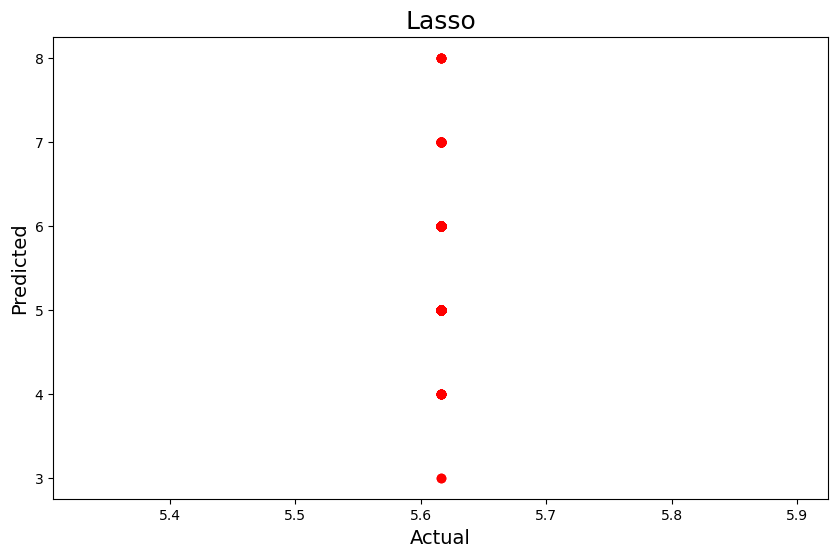



Results for Ridge:
R2_score:  0.3170250875904005
R2_score on training Data: 35.653978491355744
Mean Absolute Error:- 0.5372262569020575
Mean Squared Error:- 0.4889708307823237
Root Mean Squared Error:- 0.6992644927224059
Cross-validation scores: [0.15226    0.22852999 0.3300774  0.3413728  0.25191075]
Mean Cross-validation score: 0.26083018675466857
Difference between R2 score and cross-validation score is 5.619490083573192


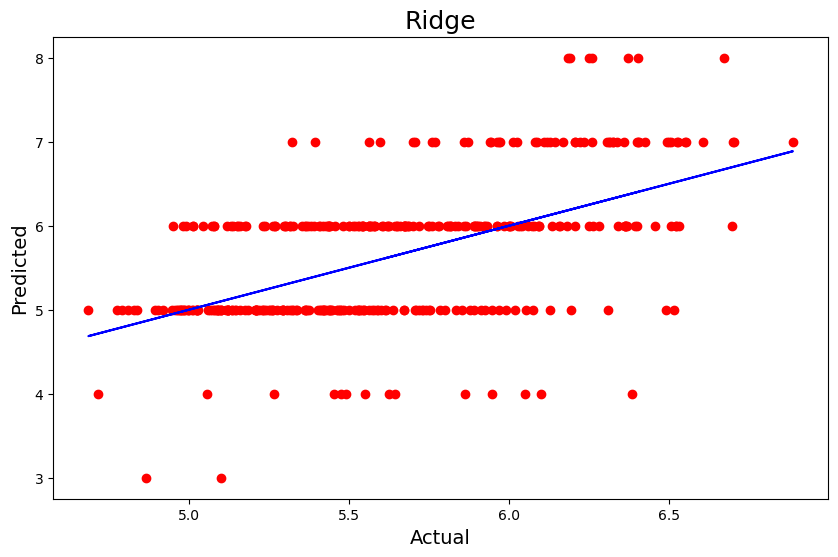

In [109]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

here, we can conclude that Ridge Regression as our best fitting and best performing model.

In [110]:
param={'alpha': [1.0, .05,.4,2], 'fit_intercept': [True, False],
       'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
       'positive': [False, True],
       "random_state":[1,4,10,20]
      }
gscv=GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [111]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'lsqr'}

In [112]:
Model=Ridge (alpha= 2, fit_intercept= True, positive= False, random_state= 1,solver= 'lsqr')

In [113]:
Model.fit(x_train,y_train) 
pred=Model.predict(x_test)
print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.317165399640413
Mean Absolute Error:- 0.5372482728745925
Mean Squared Error:- 0.48887037540919537
Root Mean Squared Error:- 0.6991926597220507


In [114]:
import joblib
joblib.dump(Model, "RedWine.pkl")

['RedWine.pkl']

In [115]:
import pickle
filename='RedWine.pkl'
pickle.dump(Model, open(filename, 'wb'))